In [1]:
# =============================================================================
# Title   : Fuzzy Logic Portfolio — Business & Management (3 Examples)
# Course  : Models and Methods of Intelligent Systems
# Topic   : Credit Scoring, Project Risk, Supplier Selection (Mamdani FIS)
# Author  : Dr.-Ing. Cesar Hernando Valencia Niño
# Date    : 2026-01-27
# =============================================================================

# =========================
# Install & Imports
# =========================
!pip -q install scikit-fuzzy ipywidgets
import numpy as np, matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from ipywidgets import interact, FloatSlider, HTML
from IPython.display import display
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except Exception:
    pass
print("Setup complete.")

# =========================
# Helper Utilities
# =========================
def plot_mfs(variable, title_suffix=""):
    plt.figure()
    for term_name, term_obj in variable.terms.items():
        plt.plot(variable.universe, term_obj.mf, label=term_name)
    plt.title(f"Membership Functions — {variable.label} {title_suffix}".strip())
    plt.xlabel(variable.label); plt.ylabel("Membership degree")
    plt.ylim(-0.05, 1.05); plt.grid(True, alpha=0.3); plt.legend(); plt.show()

def report_system(title, antecedents, consequents, rules):
    print("\n" + "="*80); print(title); print("="*80)
    def _describe(v):
        u = v.universe
        print(f"\nVariable: {v.label}")
        print(f"  Universe: [{float(u.min()):.4f}, {float(u.max()):.4f}] | Points: {len(u)}")
        print("  Fuzzy sets (terms):")
        for t in v.terms.keys(): print(f"    - {t}")
    print("\n--- Antecedents (Inputs) ---")
    for a in antecedents: _describe(a)
    print("\n--- Consequents (Outputs) ---")
    for c in consequents: _describe(c)
    print("\n--- Rule Base ---")
    for i, r in enumerate(rules, 1): print(f"{i:02d}. {str(r)}")

def build_dashboard(system, inputs_spec, output_name, title):
    sim = ctrl.ControlSystemSimulation(system)
    sliders = {name: FloatSlider(value=v0, min=vmin, max=vmax, step=step,
                                 description=name, continuous_update=False)
               for (name, vmin, vmax, step, v0) in inputs_spec}
    display(HTML(f"<h3 style='margin:6px 0'>{title}</h3>"))
    def _run(**kwargs):
        for k, v in kwargs.items(): sim.input[k] = float(v)
        sim.compute()
        y = float(sim.output[output_name])
        print(f"{output_name} (defuzzified) = {y:.6f}")
        return y
    interact(_run, **sliders)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00
Setup complete.



Example 1 — Credit Scoring (stability, debt_ratio → credit_score)

--- Antecedents (Inputs) ---

Variable: stability
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

Variable: debt_ratio
  Universe: [0.0000, 1.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

--- Consequents (Outputs) ---

Variable: credit_score
  Universe: [0.0000, 100.0000] | Points: 201
  Fuzzy sets (terms):
    - poor
    - fair
    - good

--- Rule Base ---
01. IF stability[high] AND debt_ratio[low] THEN credit_score[good]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF stability[high] AND debt_ratio[high] THEN credit_score[fair]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF stability[low] AND debt_ratio[low] THEN credit_score[fair]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF stability[low] AND debt_ratio[high] THEN credit_score[poor]
	AND aggregation function : fmin
	OR aggregation

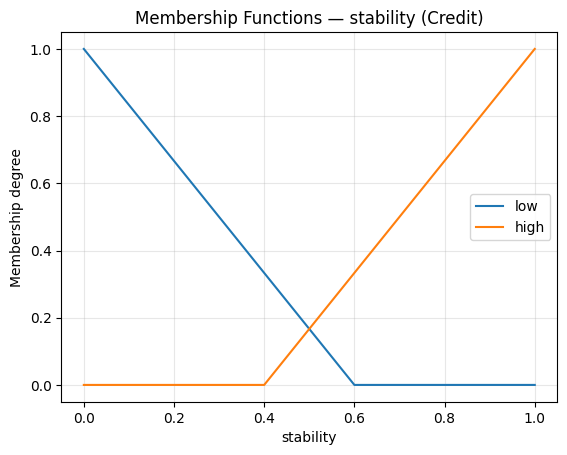

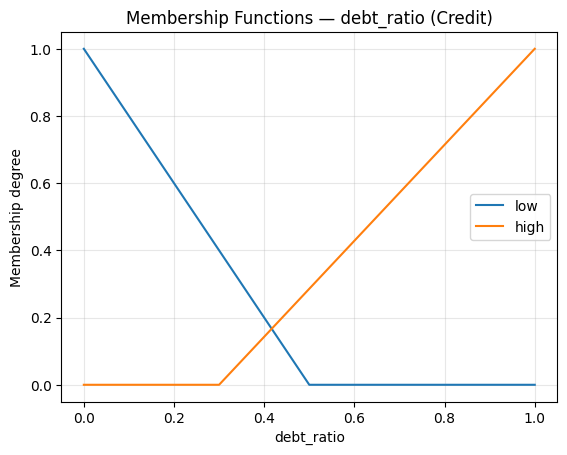

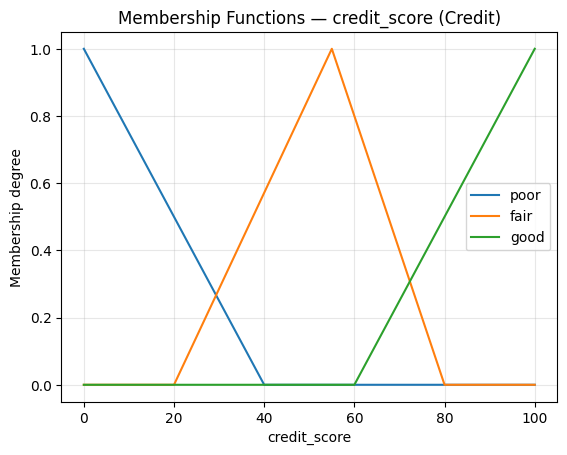

HTML(value="<h3 style='margin:6px 0'>Example 1 — Credit Scoring Dashboard</h3>")

interactive(children=(FloatSlider(value=0.7, continuous_update=False, description='stability', max=1.0, step=0…

In [2]:
# Example 1 — Credit Scoring
stability = ctrl.Antecedent(np.linspace(0, 1, 201), 'stability')
debt_ratio = ctrl.Antecedent(np.linspace(0, 1, 201), 'debt_ratio')
credit_score = ctrl.Consequent(np.linspace(0, 100, 201), 'credit_score')

stability['low'] = fuzz.trimf(stability.universe, [0, 0, 0.6])
stability['high'] = fuzz.trimf(stability.universe, [0.4, 1, 1])

debt_ratio['low'] = fuzz.trimf(debt_ratio.universe, [0, 0, 0.5])
debt_ratio['high'] = fuzz.trimf(debt_ratio.universe, [0.3, 1, 1])

credit_score['poor'] = fuzz.trimf(credit_score.universe, [0, 0, 40])
credit_score['fair'] = fuzz.trimf(credit_score.universe, [20, 55, 80])
credit_score['good'] = fuzz.trimf(credit_score.universe, [60, 100, 100])

rules = [
    ctrl.Rule(stability['high'] & debt_ratio['low'], credit_score['good']),
    ctrl.Rule(stability['high'] & debt_ratio['high'], credit_score['fair']),
    ctrl.Rule(stability['low'] & debt_ratio['low'], credit_score['fair']),
    ctrl.Rule(stability['low'] & debt_ratio['high'], credit_score['poor']),
]
system = ctrl.ControlSystem(rules)
report_system("Example 1 — Credit Scoring (stability, debt_ratio → credit_score)",
              [stability, debt_ratio], [credit_score], rules)
plot_mfs(stability, "(Credit)"); plot_mfs(debt_ratio, "(Credit)"); plot_mfs(credit_score, "(Credit)")
build_dashboard(system, [('stability', 0, 1, 0.01, 0.7), ('debt_ratio', 0, 1, 0.01, 0.4)],
                'credit_score', "Example 1 — Credit Scoring Dashboard")


Example 2 — Project Risk (complexity, pressure → proj_risk)

--- Antecedents (Inputs) ---

Variable: complexity
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

Variable: pressure
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Consequents (Outputs) ---

Variable: proj_risk
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - mid
    - high

--- Rule Base ---
01. IF complexity[low] AND pressure[low] THEN proj_risk[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF complexity[mid] OR pressure[mid] THEN proj_risk[mid]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF complexity[high] OR pressure[high] THEN proj_risk[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax


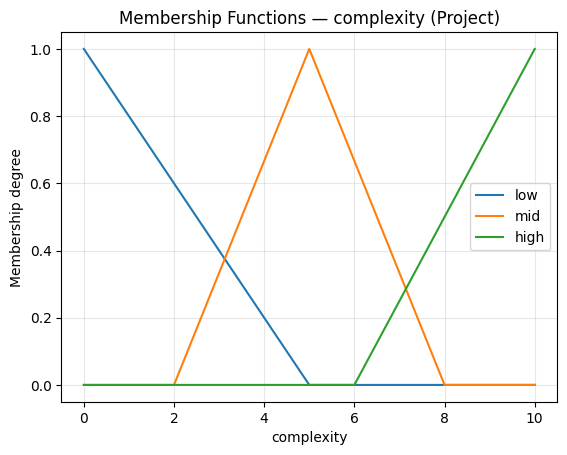

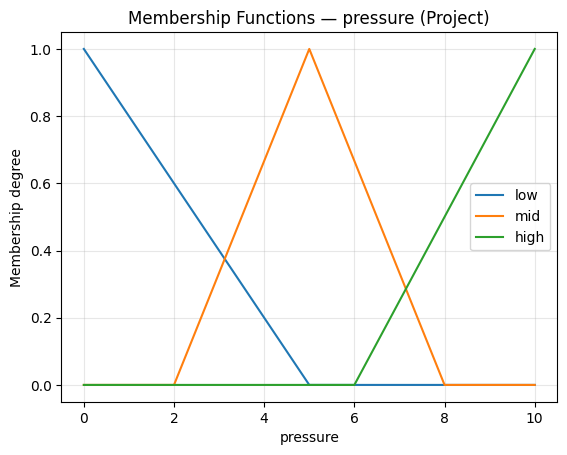

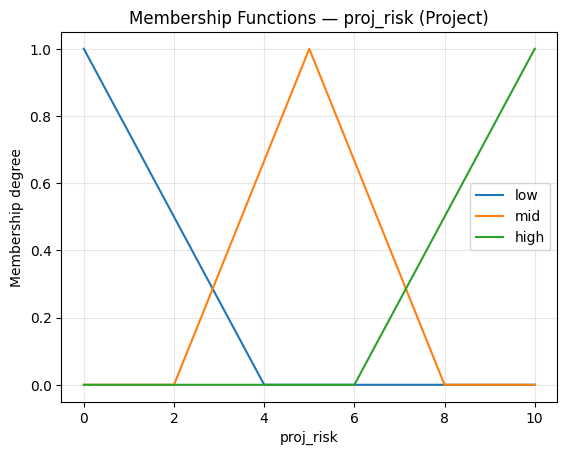

HTML(value="<h3 style='margin:6px 0'>Example 2 — Project Risk Dashboard</h3>")

interactive(children=(FloatSlider(value=6.0, continuous_update=False, description='complexity', max=10.0), Flo…

In [3]:
# Example 2 — Project Risk
complexity = ctrl.Antecedent(np.linspace(0, 10, 201), 'complexity')
pressure = ctrl.Antecedent(np.linspace(0, 10, 201), 'pressure')
proj_risk = ctrl.Consequent(np.linspace(0, 10, 201), 'proj_risk')

for v in [complexity, pressure]:
    v['low'] = fuzz.trimf(v.universe, [0, 0, 5])
    v['mid'] = fuzz.trimf(v.universe, [2, 5, 8])
    v['high'] = fuzz.trimf(v.universe, [6, 10, 10])

proj_risk['low'] = fuzz.trimf(proj_risk.universe, [0, 0, 4])
proj_risk['mid'] = fuzz.trimf(proj_risk.universe, [2, 5, 8])
proj_risk['high'] = fuzz.trimf(proj_risk.universe, [6, 10, 10])

rules = [
    ctrl.Rule(complexity['low'] & pressure['low'], proj_risk['low']),
    ctrl.Rule(complexity['mid'] | pressure['mid'], proj_risk['mid']),
    ctrl.Rule(complexity['high'] | pressure['high'], proj_risk['high']),
]
system = ctrl.ControlSystem(rules)
report_system("Example 2 — Project Risk (complexity, pressure → proj_risk)",
              [complexity, pressure], [proj_risk], rules)
plot_mfs(complexity, "(Project)"); plot_mfs(pressure, "(Project)"); plot_mfs(proj_risk, "(Project)")
build_dashboard(system, [('complexity', 0, 10, 0.1, 6.0), ('pressure', 0, 10, 0.1, 7.0)],
                'proj_risk', "Example 2 — Project Risk Dashboard")


Example 3 — Supplier Selection (quality, cost → supplier_score)

--- Antecedents (Inputs) ---

Variable: quality
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

Variable: cost
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - low
    - high

--- Consequents (Outputs) ---

Variable: supplier_score
  Universe: [0.0000, 10.0000] | Points: 201
  Fuzzy sets (terms):
    - poor
    - good
    - excellent

--- Rule Base ---
01. IF quality[high] AND cost[low] THEN supplier_score[excellent]
	AND aggregation function : fmin
	OR aggregation function  : fmax
02. IF quality[high] AND cost[high] THEN supplier_score[good]
	AND aggregation function : fmin
	OR aggregation function  : fmax
03. IF quality[low] AND cost[low] THEN supplier_score[good]
	AND aggregation function : fmin
	OR aggregation function  : fmax
04. IF quality[low] AND cost[high] THEN supplier_score[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax


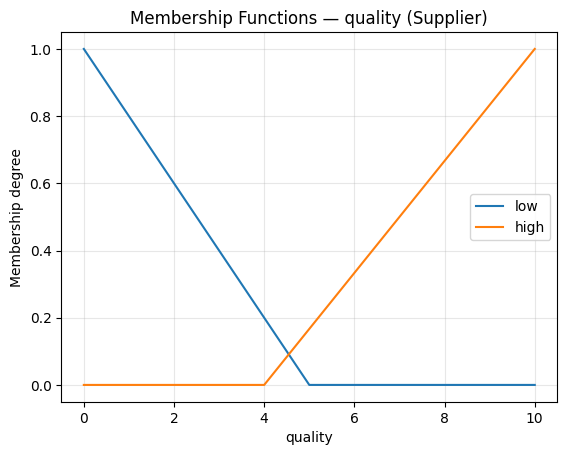

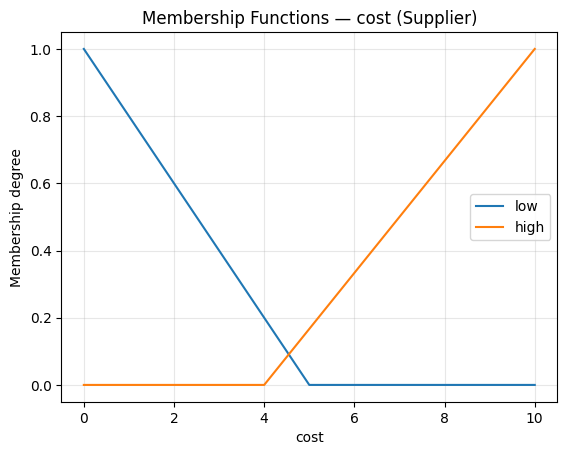

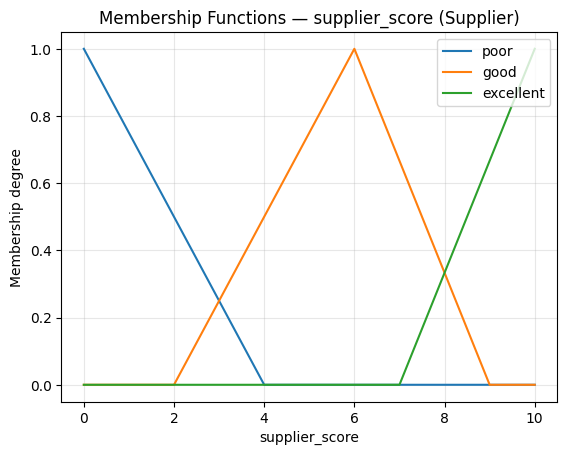

HTML(value="<h3 style='margin:6px 0'>Example 3 — Supplier Selection Dashboard</h3>")

interactive(children=(FloatSlider(value=7.0, continuous_update=False, description='quality', max=10.0), FloatS…

In [4]:
# Example 3 — Supplier Selection
quality = ctrl.Antecedent(np.linspace(0, 10, 201), 'quality')
cost = ctrl.Antecedent(np.linspace(0, 10, 201), 'cost')  # higher = more expensive
supplier_score = ctrl.Consequent(np.linspace(0, 10, 201), 'supplier_score')

quality['low'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['high'] = fuzz.trimf(quality.universe, [4, 10, 10])

cost['low'] = fuzz.trimf(cost.universe, [0, 0, 5])
cost['high'] = fuzz.trimf(cost.universe, [4, 10, 10])

supplier_score['poor'] = fuzz.trimf(supplier_score.universe, [0, 0, 4])
supplier_score['good'] = fuzz.trimf(supplier_score.universe, [2, 6, 9])
supplier_score['excellent'] = fuzz.trimf(supplier_score.universe, [7, 10, 10])

rules = [
    ctrl.Rule(quality['high'] & cost['low'], supplier_score['excellent']),
    ctrl.Rule(quality['high'] & cost['high'], supplier_score['good']),
    ctrl.Rule(quality['low'] & cost['low'], supplier_score['good']),
    ctrl.Rule(quality['low'] & cost['high'], supplier_score['poor']),
]
system = ctrl.ControlSystem(rules)
report_system("Example 3 — Supplier Selection (quality, cost → supplier_score)",
              [quality, cost], [supplier_score], rules)
plot_mfs(quality, "(Supplier)"); plot_mfs(cost, "(Supplier)"); plot_mfs(supplier_score, "(Supplier)")
build_dashboard(system, [('quality', 0, 10, 0.1, 7.0), ('cost', 0, 10, 0.1, 6.0)],
                'supplier_score', "Example 3 — Supplier Selection Dashboard")